In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import colorsys
%matplotlib inline

In [ ]:
df = pd.read_csv('fake-br.csv', sep=';')

In [17]:
df.head()

,Unnamed: 0,author,link,category,date_of_publication,number_of_tokens,number_of_words_without_punctuation,number_of_types,number_of_links_inside_the_news,number_of_words_in_upper_case,...,number_of_singular_first,number_of_plural_first,number_of_pronouns,pausality,number_of_characters,average_sentence_length,average_word_length,percentage_of_news,emotiveness,diversity
0,0,None,https://www.diariodobrasil.org/o-menino-fugiu-...,politica,30/10/2016,212,191,125,1,3,...,0,0,9,1.90909,879,17.3636,4.60209,0.000000,0.142857,0.654450
1,1,None,http://www.topfivetv.com/2016/09/ex-piloto-e-e...,sociedade_cotidiano,2016-09-15,393,352,219,0,10,...,0,0,22,2.15789,1737,18.5263,4.93466,0.014204,0.154321,0.622159
2,2,None,https://www.diariodobrasil.org/coronel-da-forc...,politica,31/03/2016,482,422,244,0,7,...,6,0,48,2.72727,2060,19.1818,4.88152,0.000000,0.282353,0.578199
3,3,None,http://www.thejornalbrasil.com.br/2017/05/lula...,politica,2017-05-06,103,95,69,0,1,...,0,0,11,2.00000,491,23.7500,5.16842,0.010526,0.142857,0.726316
4,4,None,https://www.diariodobrasil.org/ao-retornar-da-...,sociedade_cotidiano,28/01/2018,169,141,101,0,2,...,0,0,8,1.86667,653,9.4000,4.63121,0.000000,0.268657,0.716312


In [18]:
df.columns

Index(['Unnamed: 0', 'author', 'link', 'category', 'date_of_publication',
       'number_of_tokens', 'number_of_words_without_punctuation',
       'number_of_types', 'number_of_links_inside_the_news',
       'number_of_words_in_upper_case', 'number_of_verbs',
       'number_of_subjuntive_and_imperative_verbs', 'number_of_nouns',
       'number_of_adjectives', 'number_of_adverbs', 'number_of_modal_verbs',
       'number_of_singular_first', 'number_of_plural_first',
       'number_of_pronouns', 'pausality', 'number_of_characters',
       'average_sentence_length', 'average_word_length', 'percentage_of_news',
       'emotiveness', 'diversity'],
      dtype='object')

### Análise da qualidade do preenchimento da informação por Categoria da notícia

In [29]:
# Quantidade de Registros
df['category'].describe()

count         3600
unique           6
top       politica
freq          2090
Name: category, dtype: object

#### percebe-se que há 6 tipos distintos de categorias

In [28]:
# Quantidade de categorias não preenchidas
df['category'].isna().sum()

0

### Quantificando cada uma das 6 Categorias

In [20]:
df['category'].value_counts()

politica               2090
tv_celebridades         772
sociedade_cotidiano     638
ciencia_tecnologia       56
economia                 22
religiao                 22
Name: category, dtype: int64

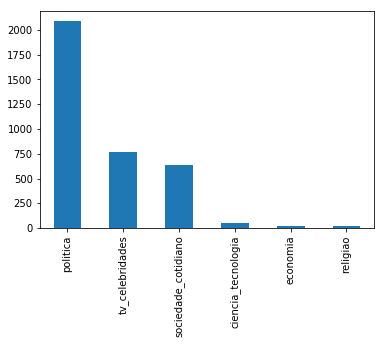

In [21]:
# Gráfico de Barras simples
df['category'].value_counts().plot.bar()

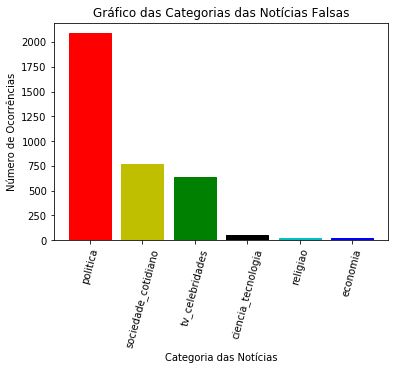

In [22]:
index = np.arange(len(df['category'].unique()))
b = plt.bar(index, df['category'].value_counts())   
b[0].set_color('r')
b[1].set_color('y')
b[2].set_color('g')
b[3].set_color('k')
b[4].set_color('c')
b[5].set_color('b')
plt.xticks(index, df['category'].unique(), rotation=75)
plt.title('Gráfico das Categorias das Notícias Falsas')
plt.xlabel('Categoria das Notícias')
plt.ylabel('Número de Ocorrências')
plt.show()

#### Pelo Gráfico acima percebe-se que a maioria absoluta dos dados são sobre Política, seguidos de Sociedade e Cotidiano e de Tv e Celebridades

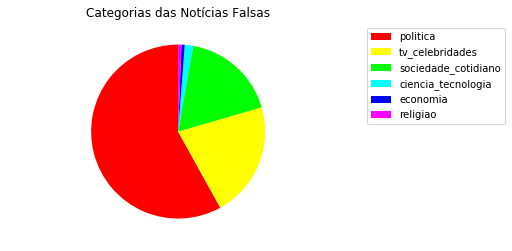

In [24]:
# Definindo a quantidade
labels = df.category.value_counts().index

# Contabilizando os elementos por cada um dos labels
num = len(df.category.value_counts().index)

# Criando a lista de cores
listaHSV = [(x*1.0/num, 1.0, 1.0) for x in range(num)]
listaRGB = list(map(lambda x: colorsys.hsv_to_rgb(*x), listaHSV))

# Gráfico de Pizza
fatias, texto = plt.pie(df.category.value_counts(), colors=listaRGB, startangle=90)
plt.axes().set_aspect('equal', 'datalim')
plt.legend(fatias, labels, bbox_to_anchor = (1.05,1))
plt.title('Categorias das Notícias Falsas')
plt.show()

#### Pelo gráfico de pizza acima é possível ver que as notícias sobre Política representam mais de 50% de todas as notícias.

### Quais os números de Tokens das Notícias?

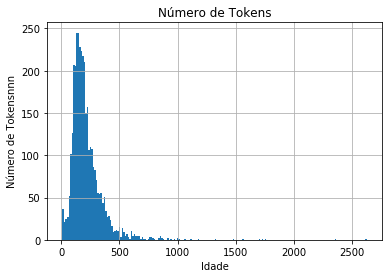

In [25]:
# gerando um histograma
df.number_of_tokens.hist(bins=200)
plt.xlabel('Idade')
plt.ylabel('Número de Tokensnnn')
plt.title('Número de Tokens')
plt.show()

#### Através do histograma acima é possível visualizar que a grande parte do número de tokens nas notícias ficam entre 50 e 400 tokens, aproximadamente, com o maior pico de dados na região entre 100 e 150 tokens